In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# df = pd.read_csv("./intact_perplexity_ordinal_regression.csv", index_col=False)
df = pd.read_csv("/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL//120422_Newalignment_dict_ordinal2//intact_perplexity_ordinal_regression//intact_perplexity_ordinal_regression_1652622160.537304.csv", index_col=False)
df = pd.read_csv("/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL//120422_Newalignment_dict_entropy//across_subject_perplexity_classifier//across_subject_perplexity_classifier_1657801751.csv", index_col=False)
# df_with_null_dist = pd.read_csv("/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL/120422_Newalignment_dict_ordinalclassifier_1000null/intact_perplexity_ordinal_regression/intact_perplexity_ordinal_regression_1653602935.csv", index_col=False)
# df_with_scrambled = pd.read_csv("/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL//120422_Newalignment_dict_multi_sentence_ordinal_regression_with_scrambled/intact_perplexity_ordinal_regression/intact_perplexity_ordinal_regression_1653879497.csv", index_col=False)
# df_with_scrambled
df

,y_col,ii,cond,roi,est,fs,model_type,mean_acc,acc_vec,perm_actual,perm_p
0,vodka_bert_entropy_score,0,intact,reward,"SVC(kernel='linear', probability=True)",PCA(n_components=20),actual,0.504286,"[0.6428571428571429, 0.5, 0.7142857142857143, ...",NaN,NaN
1,vodka_bert_entropy_score,0,intact,reward,"SVC(kernel='linear', probability=True)",PCA(n_components=20),permutation,0.488637,"[0.4362637362637363, 0.6505494505494506, 0.436...",0.482418,0.607843
2,vodka_bert_entropy_score,1,intact,reward,SVC(probability=True),PCA(n_components=20),actual,0.374286,"[0.35714285714285715, 0.21428571428571427, 0.4...",NaN,NaN
3,vodka_bert_entropy_score,1,intact,reward,SVC(probability=True),PCA(n_components=20),permutation,0.472198,"[0.4824175824175825, 0.5912087912087912, 0.526...",0.451648,0.627451
4,vodka_bert_entropy_score,2,intact,reward,"SVC(kernel='poly', probability=True)",PCA(n_components=20),actual,0.404286,"[0.35714285714285715, 0.5714285714285714, 0.42...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
155,vodka_gpt_entropy_score,77,scrambled,vision,"SVC(kernel='poly', probability=True)",PCA(n_components=20),permutation,0.491407,"[0.40769230769230774, 0.5307692307692307, 0.46...",0.498901,0.509804
156,vodka_gpt_entropy_score,78,scrambled,vision,RandomForestClassifier(),PCA(n_components=20),actual,0.428571,"[0.35714285714285715, 0.42857142857142855, 0.4...",NaN,NaN
157,vodka_gpt_entropy_score,78,scrambled,vision,RandomForestClassifier(),PCA(n_components=20),permutation,0.467451,"[0.41208791208791207, 0.4098901098901099, 0.57...",0.363736,0.941176
158,vodka_gpt_entropy_score,79,scrambled,vision,RandomForestClassifier(n_estimators=200),PCA(n_components=20),actual,0.445714,"[0.35714285714285715, 0.42857142857142855, 0.5...",NaN,NaN


In [3]:
# df.fit_method.unique()
# df["fit_method"] = \

from shared_analysis_utils import strip_est, strip_fs

df["fit_method"] = strip_est(df["fit_method"])
df["fs_method"] = strip_fs(df["fs_method"])
# df_with_scrambled["fit_method"] = strip_est(df_with_scrambled["fit_method"])
# df_with_scrambled["fs_method"] = strip_fs(df_with_scrambled["fs_method"])
# df_with_scrambled["fit_method"] = strip_est(df_with_scrambled["fit_method"])
# df_with_scrambled["fs_method"] = strip_fs(df_with_scrambled["fs_method"])
# df_with_scrambled
# df_with_null_dist["fit_method"] = [x.replace("n_estimators=","").replace(", ","").replace(", penalty='l1', ","").replace("n_neighbors=","").replace("probability=True","").replace("max_iter=1000","").replace("Classifier","").replace("RandomForest","RF").replace("KNeighbors","KN").replace("LogisticRegression","LR").replace("random_state=0","").replace("kernel=","")
#                     for x in df_with_null_dist["fit_method"]]
#
# df["fs_method"] = [x.replace("n_components=","") for x in df["fs_method"]]

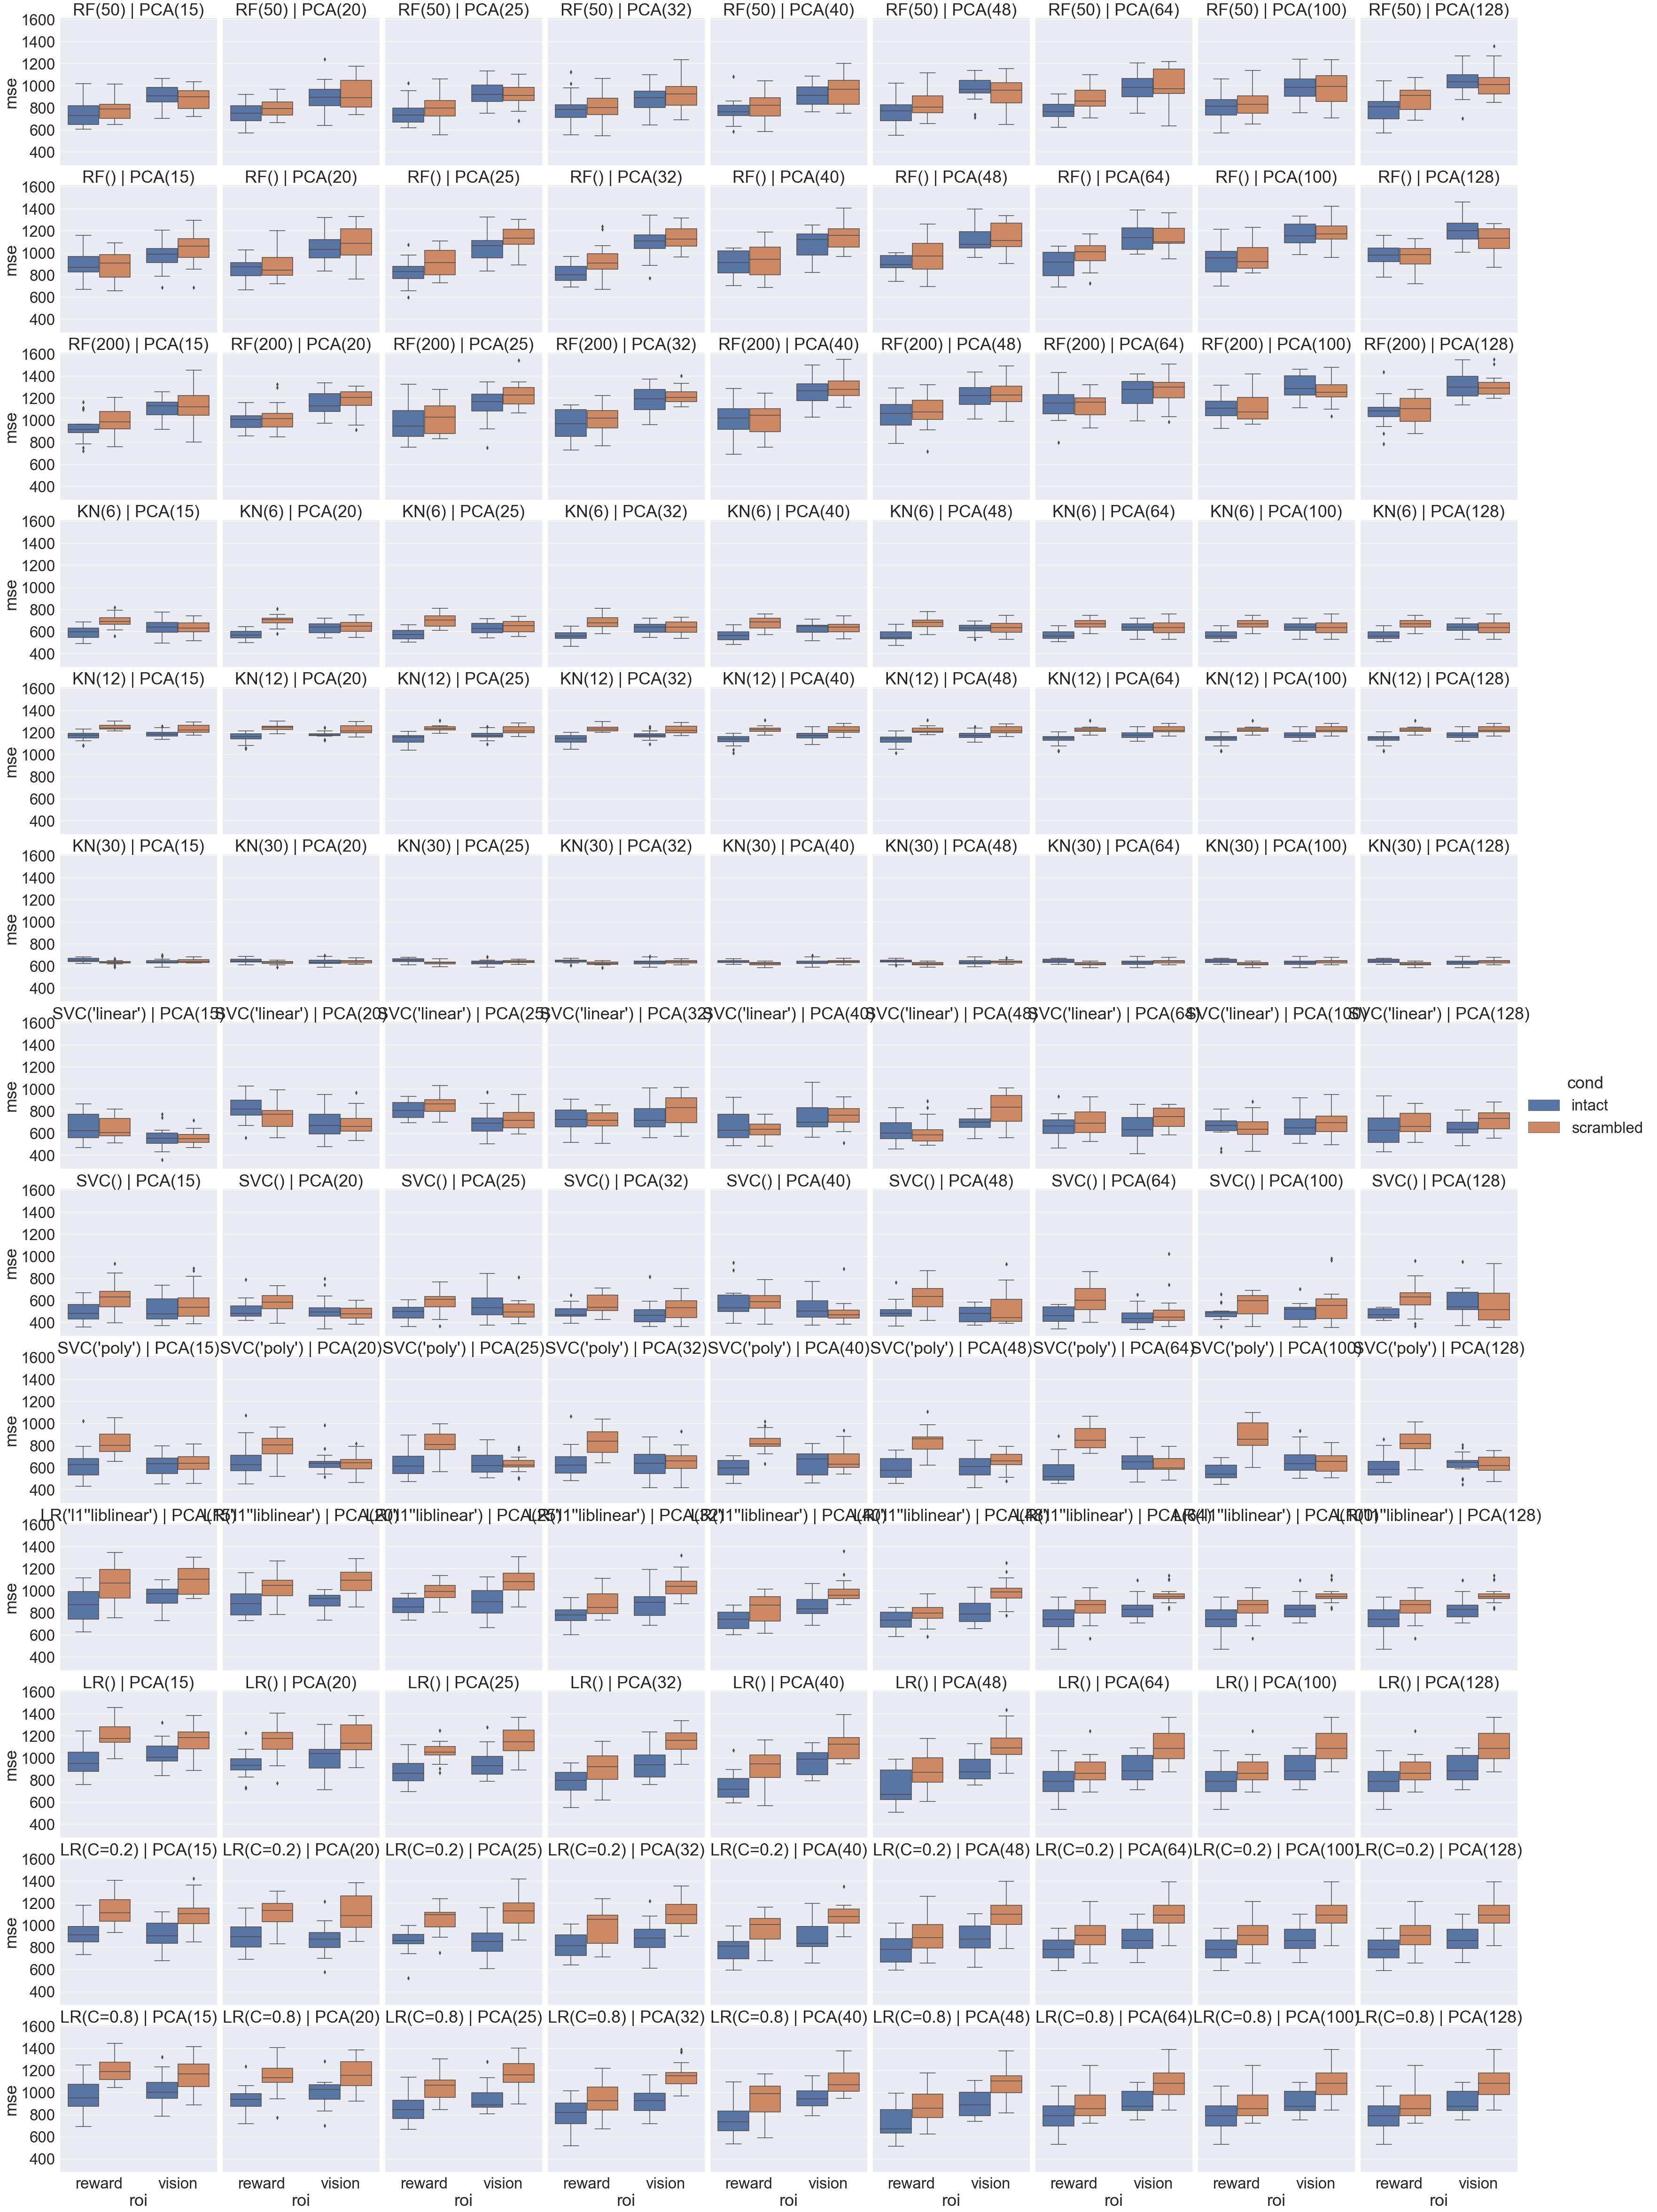

In [4]:
sns.set(font_scale=3)
g = sns.catplot(data=df, x = 'roi',y='mse',hue='cond', col='fs_method',kind='box',row='fit_method')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]  # remove the original texts
# important to add this before setting titles
g.set_titles(row_template='{row_name}', col_template='{col_name}')
sns.set(font_scale=1)


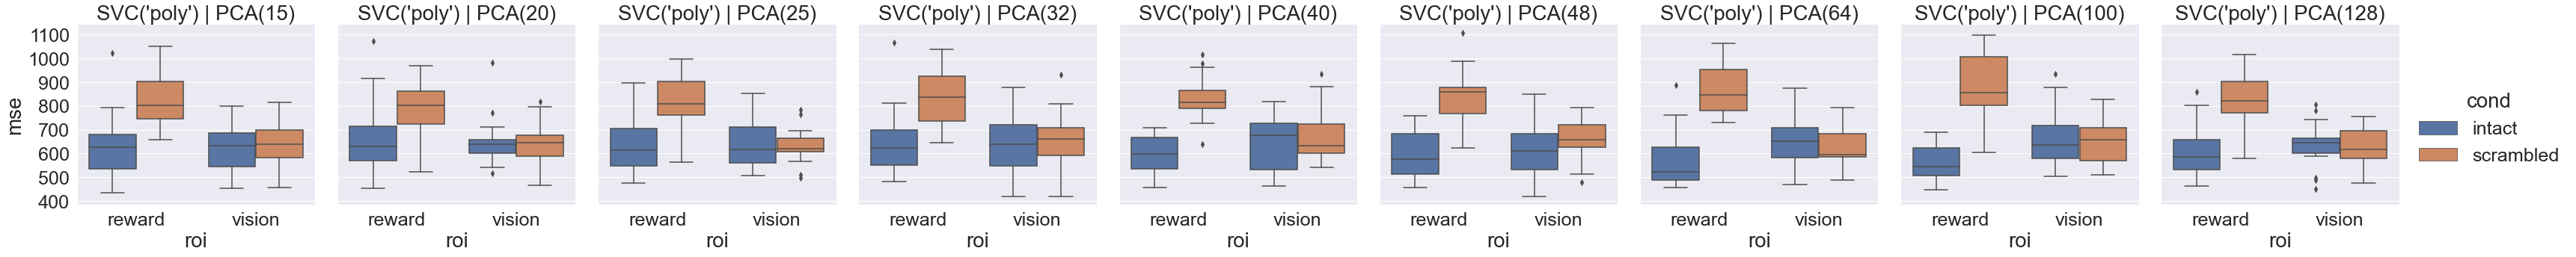

In [5]:
sns.set(font_scale=2.3)
g = sns.catplot(data=df[df.fit_method == "SVC('poly')"], x = 'roi',y='mse',hue='cond', col='fs_method',kind='box',row='fit_method')
[plt.setp(ax.texts, text="") for ax in g.axes.flat]  # remove the original texts
# important to add this before setting titles
g.set_titles(row_template='{row_name}', col_template='{col_name}')
sns.set(font_scale=1)

======= PCA(15) reward =======
Hwwlp


<Figure size 360x360 with 0 Axes>

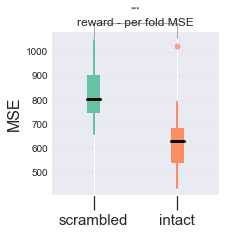

For reward, PCA(15):
roi : wilcoxon: z = 13.0 , p = 0.00067138671875 
Total 18 random vec, rank of actual (625.0563973063972) is 0.0 (0/18)
======= PCA(15) vision =======
Hwwlp


<Figure size 360x360 with 0 Axes>

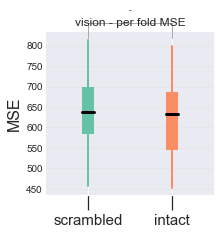

For vision, PCA(15):
roi : wilcoxon: z = 82.0 , p = 0.8985748291015625 
Total 18 random vec, rank of actual (619.0025252525252) is 0.4444444444444444 (8/18)


In [15]:
from shared_analysis_utils import draw_stars_box
for (fs, roi), df_chosen_roi in df[(df.fit_method == "SVC('poly')") & (df.fs_method == "PCA(15)")].groupby(["fs_method","roi"]):
    if 1==1:
        print("=======", fs, roi , "=======")
        plt.figure(figsize=(5,5))
        # fig, axs = plt.subplots(1, 1, figsize=(12,4))
        # fig.suptitle(f"Ordinal Classification MSE - {roi}", fontsize = 16)
        null_dist = df_chosen_roi[df_chosen_roi.cond=='scrambled'].mse
        actual_dist = df_chosen_roi[df_chosen_roi.cond=='intact'].mse
        actual_error = actual_dist.mean()

        # sns.histplot(null_dist,  bins=20, ax = axs[0])
        # axs[0].axvline(x=actual_error, color='green')
        # axs[0].set_xlabel('MSE value', fontsize = 14)
        s = draw_stars_box(
                        df_chosen_roi[df_chosen_roi.cond=='scrambled'].mse,
                        df_chosen_roi[df_chosen_roi.cond=='intact'].mse,
                        "wilcoxon", "roi",  reverse_labels=True, verbose=False, ylabel = "MSE", #title=f"{roi},{fs[:3]}",
                        xlabels = ['intact','scrambled'], title = f"{roi} - per fold MSE"
        )
        print(f"For {roi}, {fs}:")
        print(s[0])
        actual_rank = [x for x in null_dist if x < actual_error]
        print(f"Total {len(null_dist)} random vec, rank of actual ({actual_error}) is {len(actual_rank)/len(null_dist)} ({len(actual_rank)}/{len(null_dist)})")
        print("=======")

0.2222222222222222


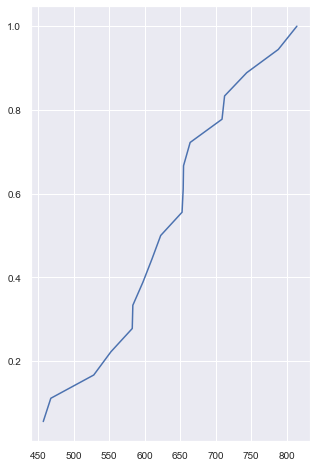

In [7]:
# import scipy
# scipy.stats.norm(null_dist.mean(), null_dist.std())
# # null_dist_cdf(actual_error)
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(null_dist)
print(ecdf(576))
plt.plot(ecdf.x, ecdf.y)
plt.show()

In [8]:
from ast import literal_eval
df_to_confmat = pd.read_csv('/Users/orenkobo/Desktop/PhD/Aim2_new/Analysis_artifacts/new_proc_FINAL//120422_Newalignment_dict_ordinal2//intact_perplexity_ordinal_regression//intact_perplexity_ordinal_regression_1652688945.csv', converters= {'y_pred': literal_eval, 'y_true': literal_eval})
df_to_confmat = df_to_confmat[(df_to_confmat.fs_method == 'PCA(n_components=64)') & (df_to_confmat.fit_method == "SVC(kernel='poly', probability=True)") ].reset_index(drop=True)
df_to_confmat

,ii,cond,roi,loo_subj,fs_method,ord_method,fit_method,mse,acc,y_pred,y_true
0,0,intact,reward,23,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",628.075758,0.015152,"[43, 23, 43, 2, 43, 43, 52, 42, 42, 64, 32, 44...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
1,1,intact,reward,30,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",495.090909,0.030303,"[39, 43, 39, 44, 39, 44, 39, 38, 39, 39, 39, 3...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
2,2,intact,reward,32,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",573.196970,0.015152,"[25, 2, 44, 44, 44, 1, 26, 13, 26, 40, 15, 15,...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
3,3,intact,reward,38,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",537.045455,0.045455,"[1, 35, 34, 44, 15, 63, 16, 44, 26, 2, 38, 16,...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
4,4,intact,reward,52,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",641.984848,0.000000,"[3, 3, 19, 22, 4, 44, 15, 44, 41, 34, 38, 15, ...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
...,...,...,...,...,...,...,...,...,...,...,...
67,67,scrambled,vision,127,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",651.666667,0.000000,"[9, 50, 6, 9, 9, 39, 8, 10, 9, 24, 39, 9, 10, ...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
68,68,scrambled,vision,128,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",642.636364,0.000000,"[29, 46, 12, 46, 46, 28, 46, 32, 8, 8, 36, 55,...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
69,69,scrambled,vision,129,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",757.454545,0.030303,"[32, 32, 42, 42, 10, 32, 51, 33, 10, 42, 6, 43...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."
70,70,scrambled,vision,130,PCA(n_components=64),ordered_classes,"SVC(kernel='poly', probability=True)",813.106061,0.000000,"[50, 50, 9, 9, 50, 22, 39, 51, 10, 32, 32, 50,...","[7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,..."


In [9]:
df_to_confmat.mse

0     628.075758
1     495.090909
2     573.196970
3     537.045455
4     641.984848
         ...    
67    651.666667
68    642.636364
69    757.454545
70    813.106061
71    490.272727
Name: mse, Length: 72, dtype: float64

In [10]:
from sklearn.metrics import mean_squared_error, confusion_matrix
df_to_confmat["conf_mat"] = df_to_confmat.apply(lambda x : confusion_matrix(x.y_pred, x.y_true), axis=1)
selected_row = df_to_confmat.iloc[1]
selected_row

ii                                                            1
cond                                                     intact
roi                                                      reward
loo_subj                                                     30
fs_method                                  PCA(n_components=64)
ord_method                                      ordered_classes
fit_method                 SVC(kernel='poly', probability=True)
mse                                                  495.090909
acc                                                    0.030303
y_pred        [39, 43, 39, 44, 39, 44, 39, 38, 39, 39, 39, 3...
y_true        [7.0, 35.0, 23.0, 44.0, 48.0, 59.0, 17.0, 9.0,...
conf_mat      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: 1, dtype: object

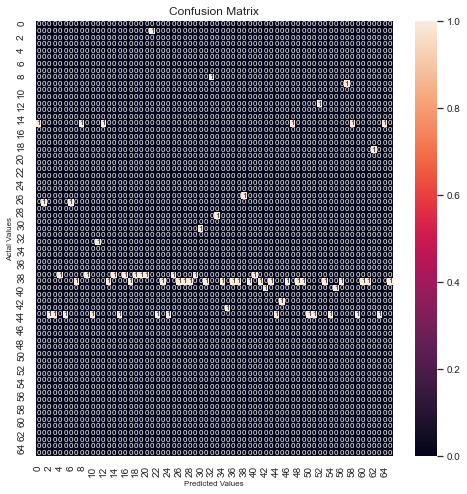

In [11]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(selected_row.conf_mat)
                     # index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     # columns = ['SETOSA','VERSICOLR','VIRGINICA'])
#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [12]:
df_to_confmat.y_pred.iloc[0]

[43,
 23,
 43,
 2,
 43,
 43,
 52,
 42,
 42,
 64,
 32,
 44,
 42,
 43,
 44,
 42,
 44,
 43,
 43,
 42,
 43,
 43,
 15,
 14,
 44,
 44,
 43,
 64,
 24,
 64,
 42,
 44,
 50,
 42,
 44,
 43,
 44,
 42,
 42,
 42,
 44,
 37,
 24,
 64,
 43,
 42,
 42,
 64,
 43,
 24,
 44,
 20,
 24,
 43,
 42,
 42,
 2,
 42,
 44,
 64,
 64,
 44,
 44,
 25,
 2,
 2]

In [13]:
a

NameError: name 'a' is not defined

In [ ]:
b